# Importando librerias

In [1]:
import pandas as pd
import datetime
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio

# Limpiando
[Dataset](https://drive.google.com/file/d/15BMOwWdVQKsK8lBibax0_ks5K6HXxdFz/view?usp=sharing)

In [2]:
path = 'C:/Users/PC/Desktop/Proyectos Personales/Music/ny_phil.csv'
ny_phil = pd.read_csv(path)
ny_phil.head(2)

e:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Location,Time,Venue,eventType,id,composerName,conductorName,interval,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra
0,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic
1,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic


In [3]:
#Dado que no nos es relevante la columna 'inverval', la eliminamos
ny_phil.drop('interval', axis = 1, inplace = True)
ny_phil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806179 entries, 0 to 806178
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               806179 non-null  object 
 1   Location           806179 non-null  object 
 2   Time               806179 non-null  object 
 3   Venue              806179 non-null  object 
 4   eventType          806179 non-null  object 
 5   id                 806179 non-null  object 
 6   composerName       737731 non-null  object 
 7   conductorName      570894 non-null  object 
 8   movement           340598 non-null  object 
 9   workTitle          737731 non-null  object 
 10  soloistInstrument  779437 non-null  object 
 11  soloistName        780096 non-null  object 
 12  soloistRoles       779834 non-null  object 
 13  season             781218 non-null  object 
 14  programID          781218 non-null  float64
 15  orchestra          781218 non-null  object 
dtypes:

In [4]:
#Los compositores y directores con NaN los llenamos con un 'Desconocido'
#Haremos lo mismo con los titulos de las obras y las orquestas con NaN
to_unknown = ['composerName', 'conductorName', 'workTitle', 'orchestra']
ny_phil[to_unknown] = ny_phil[to_unknown].fillna('Unknown')

#Si la obra consta de un solo movimiento se llenara como 0
ny_phil['movement'] = ny_phil['movement'].fillna('0')

to_none = ['soloistInstrument', 'soloistName', 'soloistRoles']
#Si no hay solita entonces lo llenamos con None
ny_phil[to_none] = ny_phil[to_none].fillna('None')

#Finalmente vamos a eliminar 
ny_phil.dropna(inplace = True)

ny_phil.head(2)

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra
0,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic
1,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic


In [5]:
#Notamos que hay valores en la columna 'soloistInstrument' estan los valores ' ',
# 'Piano; Piano', 'Dancer;...', entonces vamos a eliminarlos 
ny_phil['soloistInstrument'].unique()

array(['Soprano', 'Piano', 'Violin', 'Viola', 'Cello', 'Contrabass',
       'Tenor', 'Flute', 'Clarinet', 'Bassoon', 'French Horn', 'None',
       'Oboe', 'Vocalist', 'Harp', 'Cornet', 'Alto', 'Bass',
       'Mens Chorus', 'Trumpet', 'Saxhorn', 'Womens Chorus', 'Baritone',
       'Chorus', 'Mezzo-Soprano', 'Organ', 'Trombone', 'Contralto',
       'Speaker', 'SATB Chorus', 'Narrator', 'Boys Choir', 'Reader',
       'Bass Clarinet', 'Ensemble', 'Other', 'Orchestra', 'Vocal Group',
       ' ', 'Elementary Chorus', 'Advanced Chorus', 'Piccolo',
       'Sing-Along', "Viola d'amore", 'English Horn', 'Harpsichord',
       'Dancer', 'Clavier', 'Viola tenore', 'Reciter',
       'Unspecified Voice', "Children's Chorus", 'Vocal Quartet',
       'Harmonium', 'String Quartet', 'Solo Voice', 'Duo-Art Piano',
       'Trombone Choir', 'Actor', 'Drum', 'Xylophone', 'Folk Singer',
       'Conductor', 'Treble [Boy soprano]', 'Tuba', 'Piano trio',
       'E-Flat Clarinet', 'Timpani', 'Percussion',
       

In [6]:
errors = [' ', 'Piano; Piano', 'Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Choreographer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Scenic Design',
       'Dancer; Choreographer',
       'Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer',
       'Dancer; Dancer; Choreographer; Choreographer',
       'Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Choreographer; Dancer; Dancer']

ny_phil = ny_phil[~ny_phil['soloistInstrument'].isin(errors)]

## Transformamos las columnas

In [7]:
#Separamos el Estado de Location
state = ny_phil['Location'].str.split(', ', expand = True)
ny_phil['Location'] = state[0]
ny_phil['State'] = state[1]
ny_phil.head(2)

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra,State
0,1842-12-07T05:00:00Z,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1,1842-12-07T05:00:00Z,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


In [8]:
ny_phil['Date'] =  ny_phil['Date'].str.split('T', expand = True)[0]
ny_phil.head(2)

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra,State
0,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


In [9]:
ny_phil.columns = ny_phil.columns.str.capitalize()
ny_phil.head(2)

,Date,Location,Time,Venue,Eventtype,Id,Composername,Conductorname,Movement,Worktitle,Soloistinstrument,Soloistname,Soloistroles,Season,Programid,Orchestra,State
0,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


In [10]:
#Pasamos a category y a datetime
categories = ['Location', 'Venue', 'Eventtype', 'Composername', 'Conductorname', 'Soloistinstrument', 'Soloistname', 'Season', 'Orchestra']
ny_phil[categories] = ny_phil[categories].astype('category') 
ny_phil['Date'] = pd.to_datetime(ny_phil['Date'])

#Indicamos el indice
ny_phil.index = ny_phil['Date']
ny_phil.drop('Date', axis = 1, inplace = True)
ny_phil.head(2)

,Location,Time,Venue,Eventtype,Id,Composername,Conductorname,Movement,Worktitle,Soloistinstrument,Soloistname,Soloistroles,Season,Programid,Orchestra,State
Date,,,,,,,,,,,,,,,,
1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


# Compositores más tocados

Para poder hacer el conteo hay que hacer algo importante
Por ejemlo, el Mesias de Handel lleva un coro y por cada integrante del coro se va a crear un nuevo registro ya que la parte de "solistas" va a ir cambiando por cada integrante pero el registro va a contener el mismo id del programa, por lo que si contaramos el numero de veces que Handel es tocado vamos a notar de que la cuenta es incorrecta, pues estariamos contanto que el Mesisas fue tocado una vez por cada integrante del coro. Así, debemos de eliminar las columnas relacionadas a los solistas y posteriormente eliminar los registros duplicados

Además notamos que hay que eliminar la columna 'Movement' puesto que si una sinfonía tiene 4 movimientos entonces al momento de contar los registros nos va a aparecer que la sinfonía  fue tocada 4 veces, lo cual es incorrecto

In [11]:
#Dataset para poder contar los registros
unicos = ny_phil.copy()
unicos = unicos[['Location', 'Id', 'Composername', 'Conductorname', 'Worktitle', 'Season', 'Programid']]
unicos.drop_duplicates(inplace = True)
unicos.head(2)

,Location,Id,Composername,Conductorname,Worktitle,Season,Programid
Date,,,,,,,
1842-12-07,Manhattan,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli","SYMPHONY NO. 5 IN C MINOR, OP.67",1842-43,3853.0
1842-12-07,Manhattan,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Weber, Carl Maria Von","Timm, Henry C.",OBERON,1842-43,3853.0


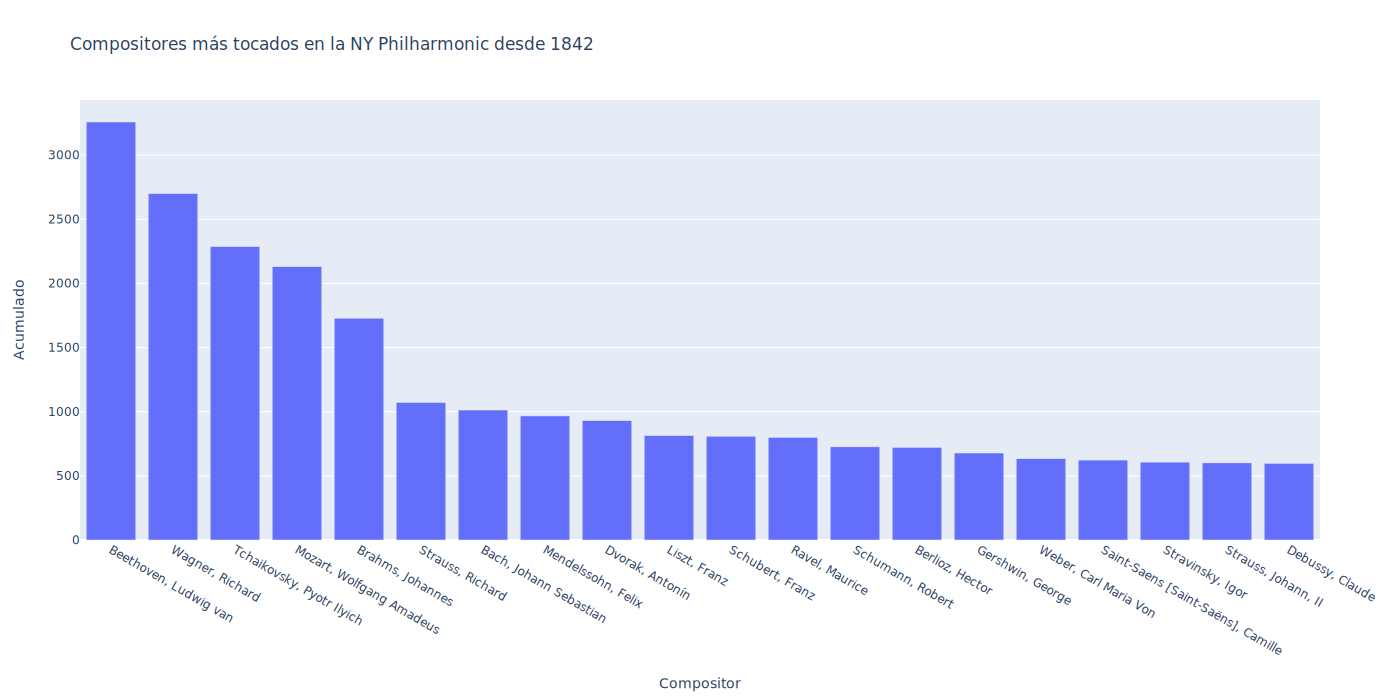

In [12]:
#eliminamos los registros de 'Unknown' y de 'Traditional,'
compositores = unicos[~unicos['Composername'].isin(['Unknown', 'Traditional,'])]

#Agrupamos por nombre del compositor y ordenamos
compositores_top = compositores.groupby(by = 'Composername').count()
compositores_top.sort_values('Location', ascending = False, inplace = True)
compositores_top.reset_index(inplace = True)
compositores_top = compositores_top[:20]

#graficamos
labels1 = {'Composername' : 'Compositor', 'Location' : 'Acumulado'}
title1 = 'Compositores más tocados en la NY Philharmonic desde 1842'
fig = px.bar(compositores_top, x = 'Composername', y = 'Location', title = title1, labels = labels1, width=1400, height=700)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer = 'svg')


# Función para ver el núnero de obras ejecutadas por compositor en cada año

In [13]:
def hist_comp(compositor:str, inicio=1842, fin=2017):
    '''
    Funcion que regresa una grafica del numero de obras tocadas por
    el compositor dado durante los años especificados
    Entrada:
            compositor: Nombre del compositor
            inicio: Año desde el cual va a iniciar la grafica
            fin: Año en el cual va a termianr la grafica
    '''
    
    #Seleccionamos el compositor dado
    compositordf = unicos[unicos['Composername'].str.contains(compositor)]

    #Buscamos entre las fechas dadas
    compositordf = compositordf.loc[str(inicio):str(fin)]
    
    #Agrupamos por año y contamos el numero de apariciones
    compositordf =  compositordf.groupby(compositordf.index.year).count()
    compositordf.reset_index(inplace = True)
    
    #Indiciamos los labels, el titulo y procedemos a grafica
    labels2 = {'Date' : 'Año', 'Location' : 'Obras ejecutadas'}
    title2 = 'Número de obras ejecutadas de ' + compositor

    fig = px.bar(compositordf, x = 'Date', y = 'Location', title = title2, labels = labels2, width=1400, height=700)
    fig.show(renderer = 'svg')

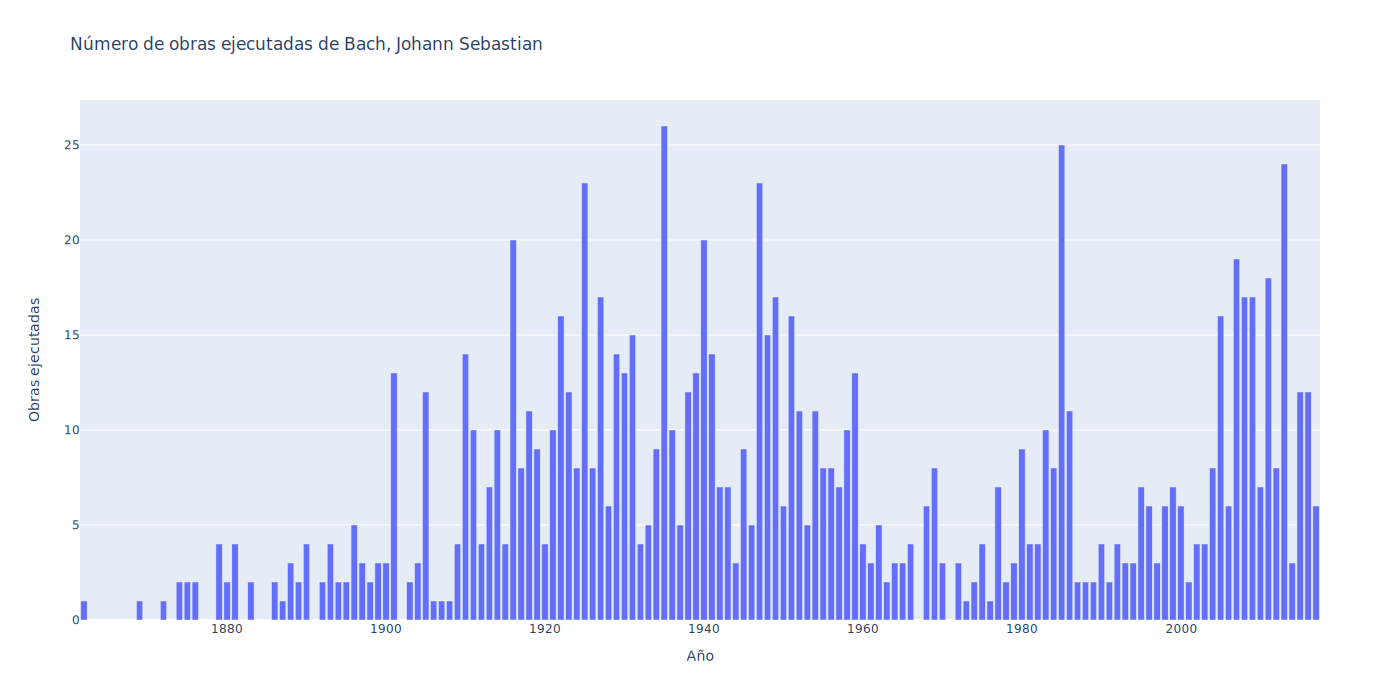

In [14]:
hist_comp('Bach,  Johann  Sebastian')

### Cuando Mendelssohn redescubrió la música de Bach (aproximadamente en 1829) no se tocaba mucho, pero notamos que poco a poco fue subiendo su popularidad y su aceptación hasta llegar a auge aproximadamente en 1940

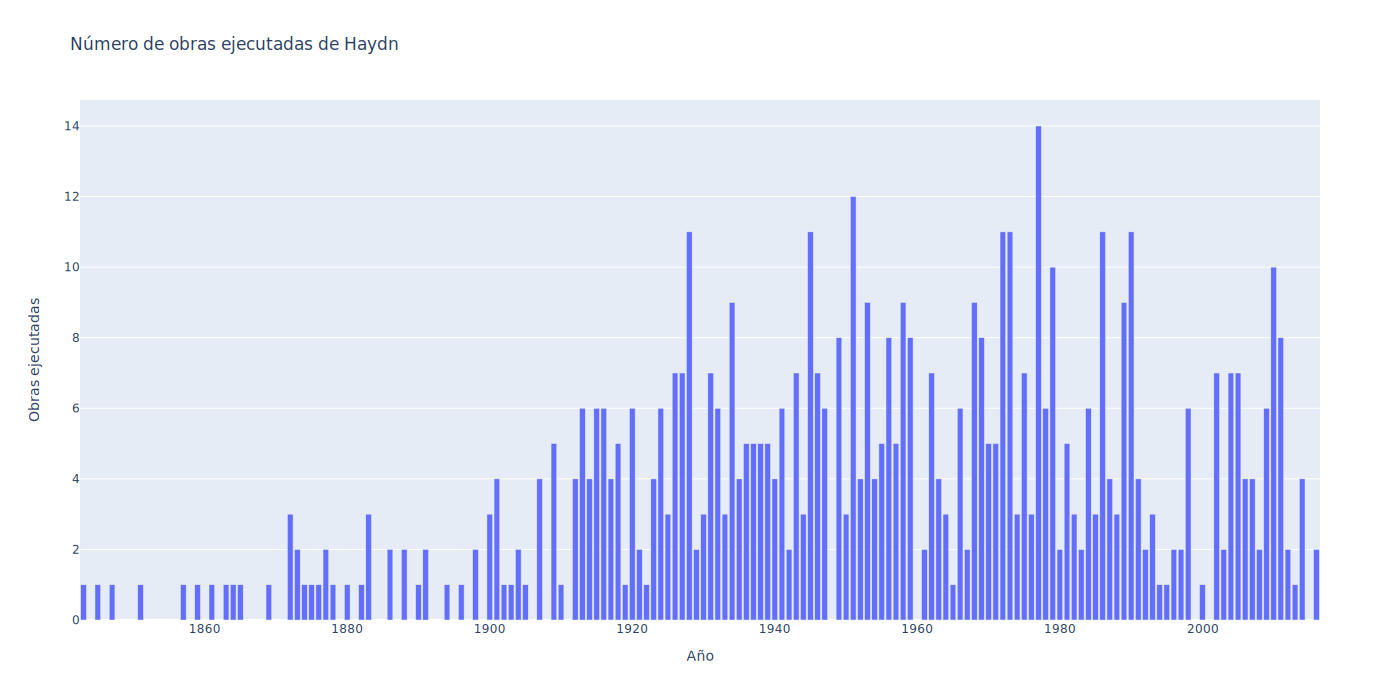

In [15]:
hist_comp('Haydn')

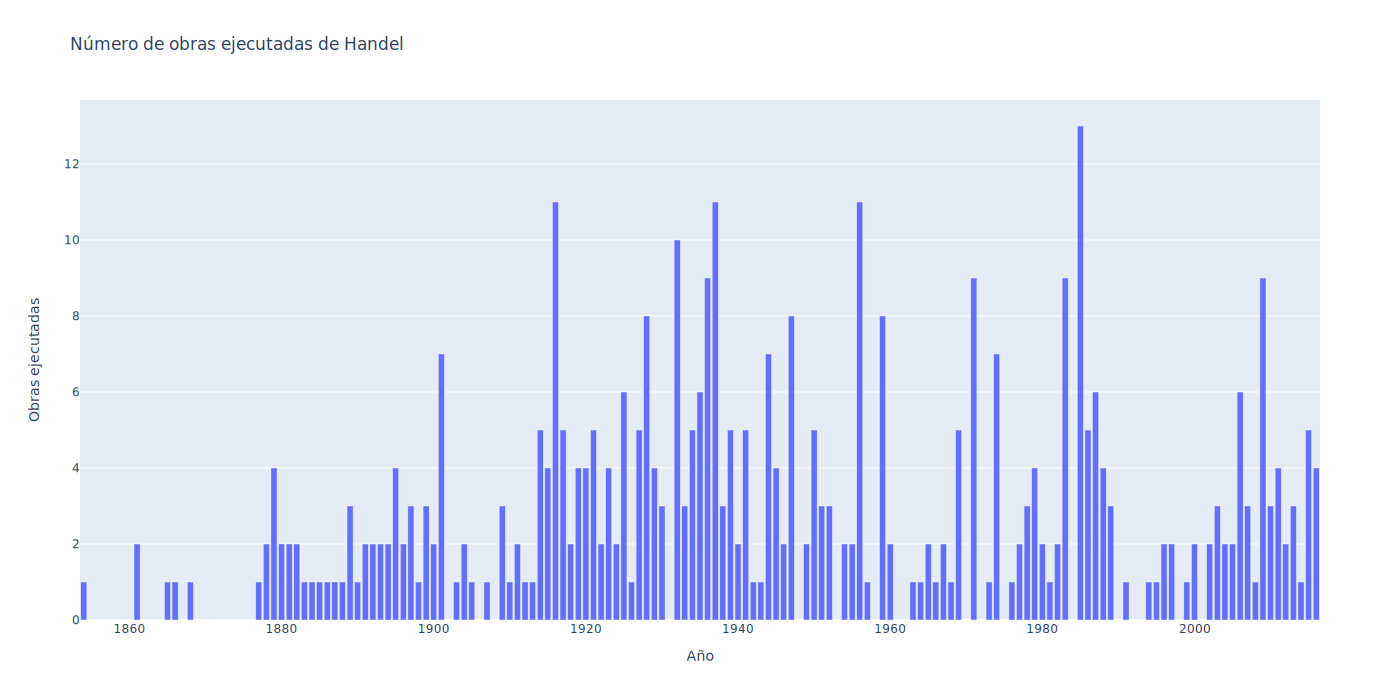

In [16]:
hist_comp('Handel')

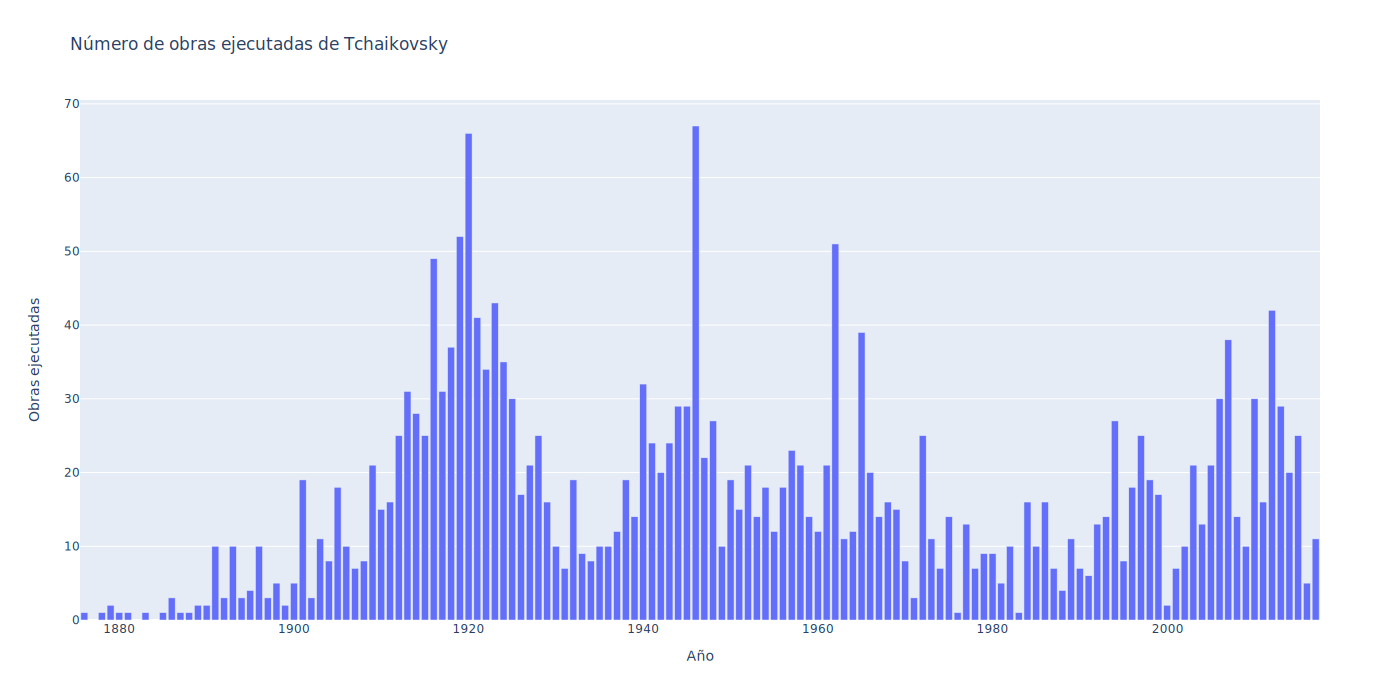

In [17]:
hist_comp('Tchaikovsky')

Notamos que hay un gran pico en el año 1991. Esto es debido a que en dicho año se cumplieron 200 años de la muerte del compositor Mozart

## Compositores más tocados por director

In [18]:
'''Funcion que regresa una grafica de los compositores mas tocados por director'''
def hist_director(director:str):
    #Buscamos los conciertos en donde dirigio el director dado
    directordf = unicos[unicos['Conductorname'].str.contains(director)]

    #Agrupamos por compositor y contamos
    directordf = directordf.groupby('Composername').count()

    #Ordenamos y elegimos el top 20
    directordf.sort_values('Location', ascending = False, inplace = True)
    directordf.reset_index(inplace = True)
    directordf = directordf[:20]

    #Indicamos los labels, el titulo y procedemos a graficar
    labels2 = {'Composername' : 'Compositor', 'Location' : 'Obras ejecutadas'}
    title2 = 'Compositores más ejecutados por ' + director

    fig = px.bar(directordf, x = 'Composername', y = 'Location', title = title2, labels = labels2, width=1400, height=700)
    fig.show(renderer = 'svg')

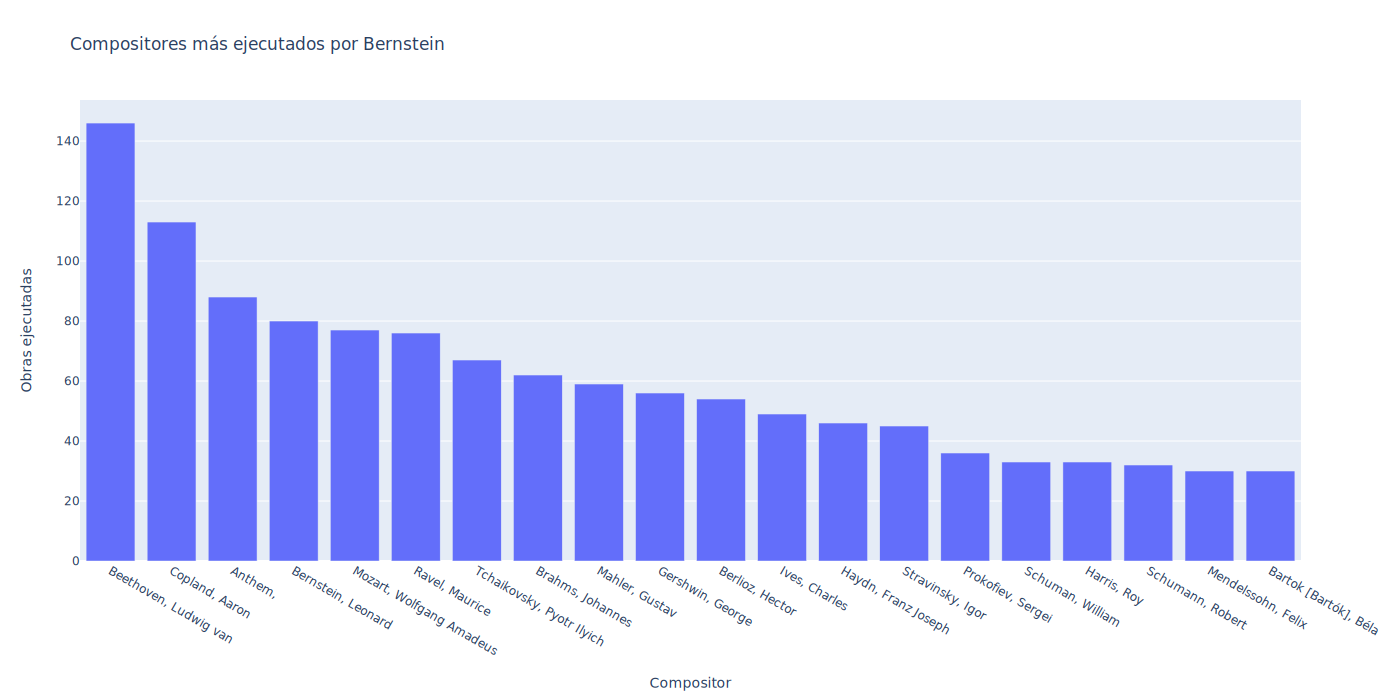

In [19]:
hist_director('Bernstein')

# Analizando a Stravinsky

Primero vamos a ver la popularidad del famoso compositor Igor Stravinsky en la filarmónica de NY

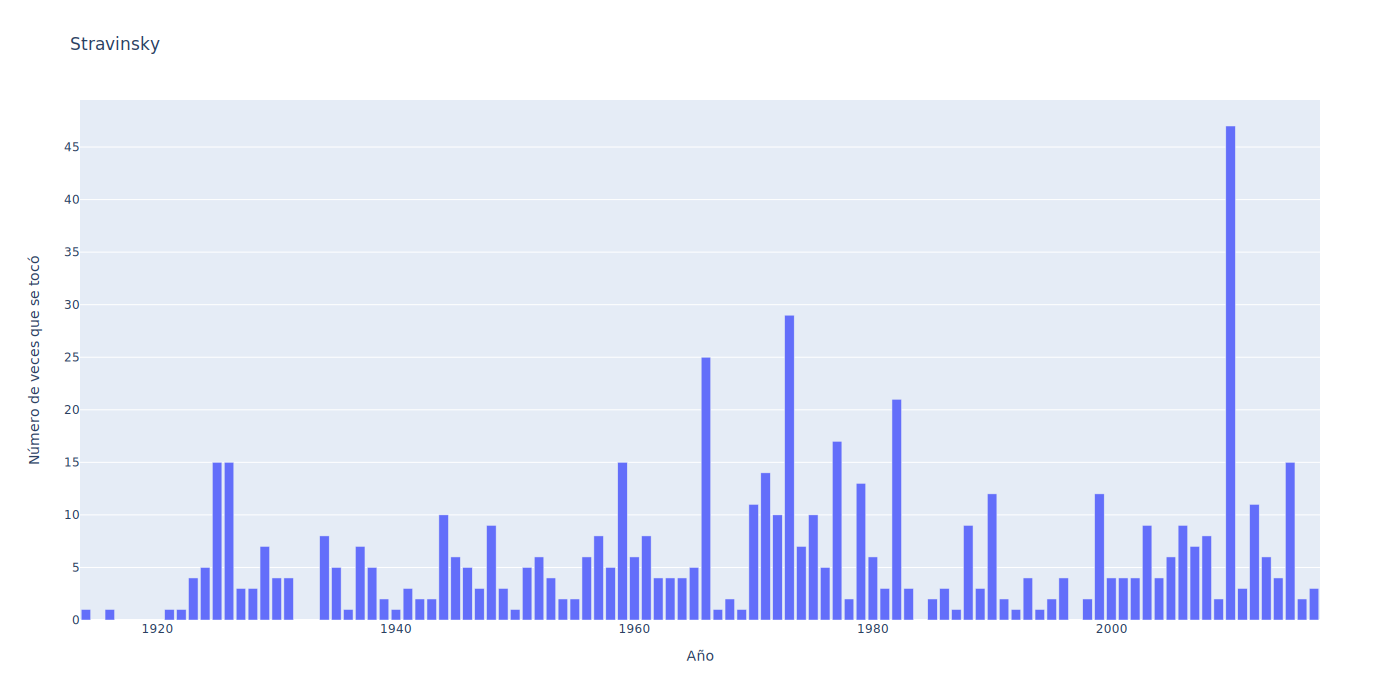

In [20]:
#Buscamos todas las veces que se toco una obra de Stravinsky
stravinsky = unicos[unicos['Composername'].str.contains('Stravinsky')]

#Agrupamos para poder contar y procedemos a graficar
stra_hist = stravinsky.groupby(stravinsky.index.year).count()
stra_hist.reset_index(inplace = True)

labels3 = {'Date' : 'Año', 'Location' : 'Número de veces que se tocó'}

fig = px.bar(stra_hist, x = 'Date', y = 'Location', title = 'Stravinsky', labels = labels3, width=1400, height=700)
fig.show(renderer = 'svg')

Podemos ver claramente que en el año 2010 hay un boom en la ejecucion de sus obras

El Pájaro de Fuego es posiblemente la obra que hizo que Stravinsky fuera mundialmente reconocido. Dicha obra es la primera de sus tres ballets que compuso, el segundo de ellos se llama Petrushka y el último (posiblemente el que causo más controversia) es La Consagración de la Primavera

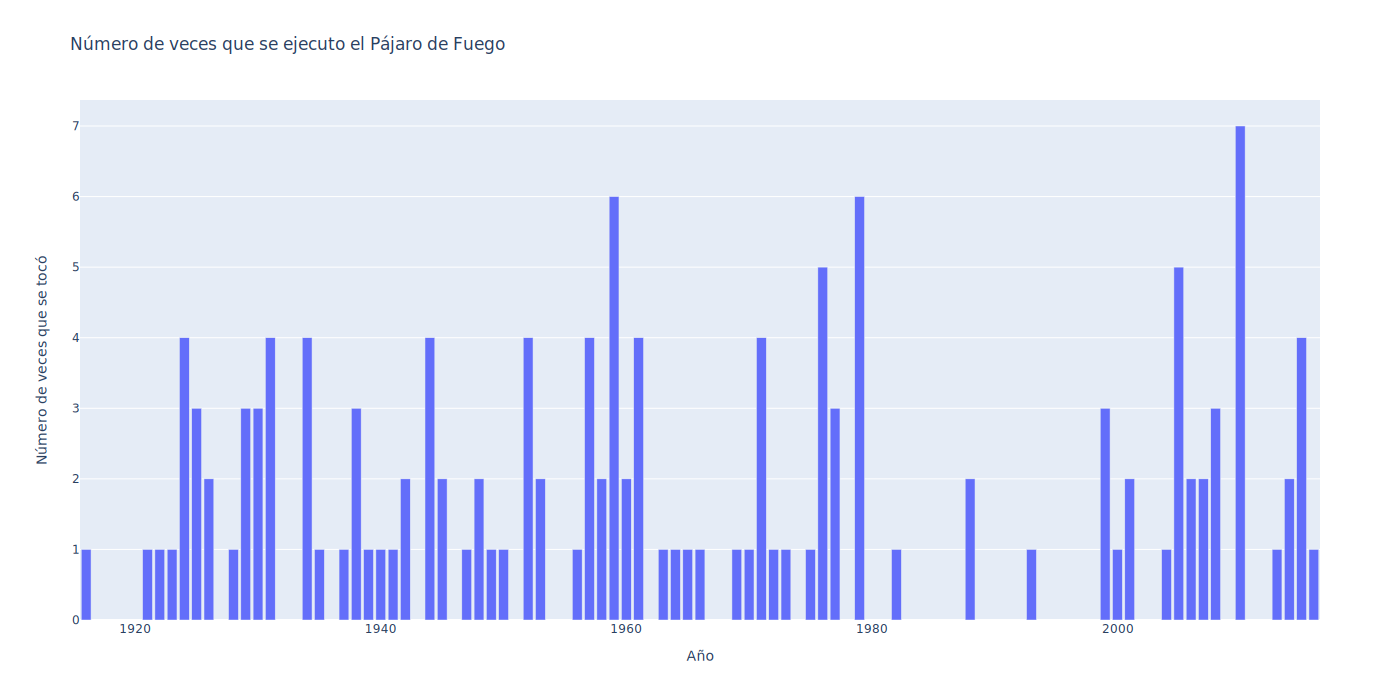

In [21]:
#Vamos a analizar la popularidad de su ballet "El Pájaro de Fuego"
firebird = unicos[unicos['Worktitle'].str.contains('FIREBIRD')]
firebird = firebird.groupby(firebird.index.year).count()
firebird.reset_index(inplace = True)

labels3 = {'Date' : 'Año', 'Location' : 'Número de veces que se tocó'}

fig = px.bar(firebird, x = 'Date', y = 'Location', title = 'Número de veces que se ejecuto el Pájaro de Fuego', labels = labels3, width=1400, height=700)
fig.show(renderer = 'svg')


De igual manera observamos que en el año 2010 es cuando se tocó más veces el ballet ya mencionado

Otro punto importante es que la primera vez que se ejecutó fue en el año 1916, 6 años después de su estreno en la Ópera de París. Esto es un poco extraño debido a que la orquesta de Nueva York tardó 6 años en tocar una obra la cual fue un exito inmediato en París. Lo esperado es que dicha composición haya sido ejecutada en Estados Unidos poco tiempo despues del estreno

e:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



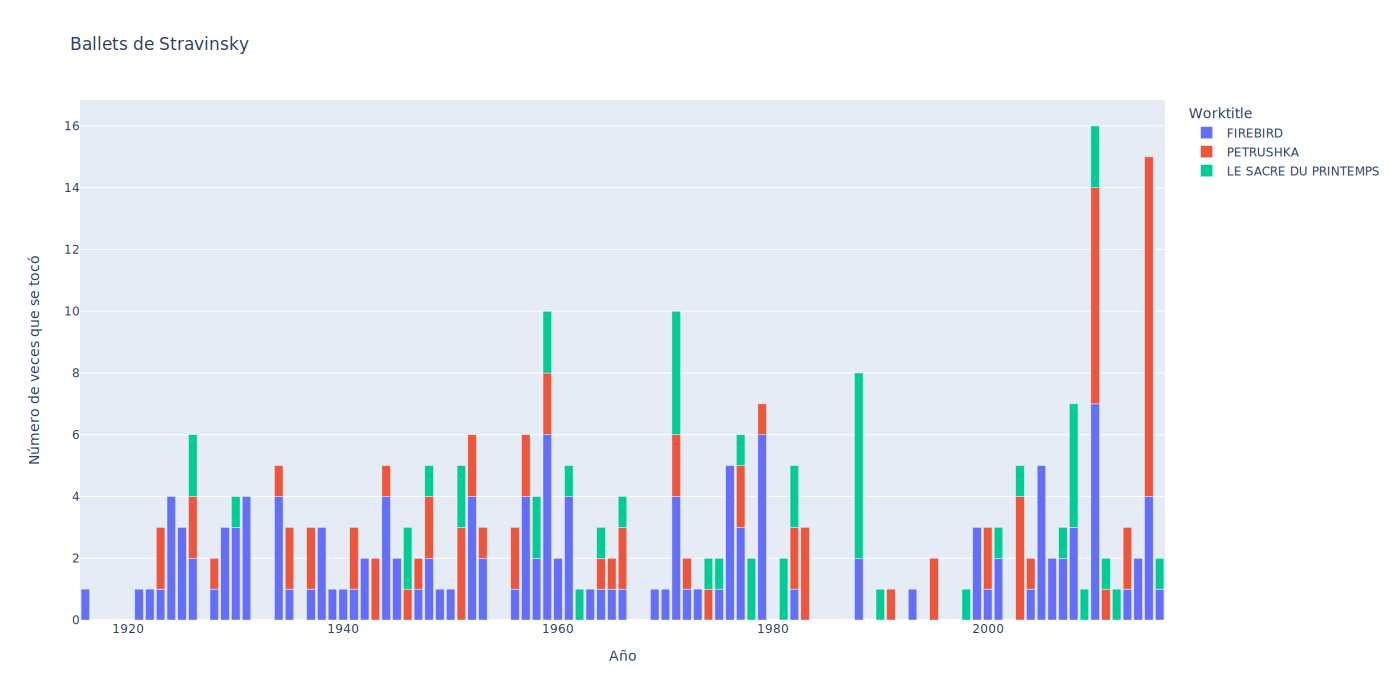

In [22]:
#Ahora vamos a analizar en conjunto sus tres ballets, los cuales son sus obras más conocidas

#Primero tomamos una lista con el nombre de los tres ballets
ballets_lista = ['FIREBIRD', 'PETRUSHKA ', 'SACRE DU PRINTEMPS']

#Vamos a reemplazar el nombre de los ballets
def reemplazar(variable):
    if variable.str.contains('FIREBIRD'):
        variable = 'FIREBIRD'
    elif variable.str.contains('PETRUSHKA'):
        variable = 'PETRUSHKA'
    elif variable.str.contains('SACRE DU PRINTEMPS'):
        variable = 'LE SACRE DU PRINTEMPS'

#Ahora buscamos las veces que se tocaron, ya sea acompañado de ballet, su version orquestal, piano, etc
ballets = unicos[unicos['Worktitle'].str.contains('|'.join(ballets_lista))]
#Reemplazamos el nombre de los ballets

ballets.loc[(ballets['Worktitle'].str.contains('FIREBIRD')), 'Worktitle'] = 'FIREBIRD'
ballets.loc[(ballets['Worktitle'].str.contains('PETRUSHKA')), 'Worktitle'] = 'PETRUSHKA'
ballets.loc[(ballets['Worktitle'].str.contains('SACRE DU PRINTEMPS')), 'Worktitle'] = 'LE SACRE DU PRINTEMPS'

#Agrupamos para poder contar
ballets = ballets.groupby([ballets.index.year, 'Worktitle']).count()
ballets.reset_index(inplace = True)

labels3 = {'Date' : 'Año', 'Location' : 'Número de veces que se tocó'}

fig = px.bar(ballets, x = 'Date', y = 'Location', color ='Worktitle', title = 'Ballets de Stravinsky', labels = labels3, width=1400, height=700)
fig.show(renderer = 'svg')

Claramente el ballet "El Pájaro de Fuego" es el más tocado. 

Además, al juntar los tres vemos que en el año 2010 hay un aumento drásctico de número de ejecuciones. Esto se puede explicar debido a que en dicho año se cumple en aniversario número 100 del estreno en París del Pájaro de Fuego

## Analizando los ultimos 20 años

In [114]:
data50 = unicos.loc['1997':]

#Veamos los compositores más tocados recientemente
top20 = data50.groupby('Composername').agg({'Composername':'count'})
top20.columns = ['Count']
top20.reset_index(inplace = True)
top20.sort_values('Count', ascending = False, inplace = True)

#Eliminamos el autor desconocido y hacemos un  top 20
top20 = top20[1:21]

fig = px.bar(top20, x = 'Composername', y = 'Count', title = 'Los 20 compositores más tocados recientemente', width=1400, height=700)
fig.show()

Podemos ver que hay un cierto equilibrio en cuanto a periodos musicales debido a que se tocan tanto autores como del barroco, clasicismo, romanticismo y contemporaneos.
Un detalle a notar es que el unico compositor barroco es Bach pero se encuentra en un puesto alto